In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [183]:
df = pd.read_csv('./Book2.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.384459,0.733863,-7.950000e-07,0.305103,0.662457,0.007510,0.261370,0.573788,0.005625,0.224733,...,0.621929,0.429524,-0.045429,0.627556,0.370509,-0.057343,0.601878,0.321157,-0.064413,fa
1,0.432905,0.758721,-4.190000e-07,0.322904,0.656030,-0.009076,0.265172,0.563117,-0.019573,0.234436,...,0.691468,0.425548,-0.045990,0.700856,0.359910,-0.065490,0.682041,0.303733,-0.076957,fa
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,fa
3,0.408896,0.963374,-4.310000e-07,0.317337,0.861122,-0.042097,0.263011,0.741786,-0.073506,0.237238,...,0.752633,0.660164,-0.121201,0.785297,0.587629,-0.154700,0.784539,0.515476,-0.178205,fa
4,0.271372,0.911371,-4.930000e-07,0.191852,0.802524,-0.019764,0.148339,0.693291,-0.040219,0.108322,...,0.582365,0.587454,-0.099238,0.603931,0.516190,-0.122474,0.595994,0.449261,-0.136125,fa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47297,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,dha
47298,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,dha
47299,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,dha
47300,0.472123,0.782441,1.040000e-06,0.403196,0.711328,-0.042498,0.345186,0.634118,-0.071907,0.280481,...,0.707475,0.658451,-0.124105,0.676248,0.680118,-0.127985,0.638496,0.704166,-0.122706,dha


In [184]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (47302, 64)


In [185]:
all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 13766


In [186]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [187]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.384459,0.733863,-7.950000e-07,0.305103,0.662457,0.007510,0.261370,0.573788,0.005625,0.224733,...,0.621929,0.429524,-0.045429,0.627556,0.370509,-0.057343,0.601878,0.321157,-0.064413,fa
1,0.432905,0.758721,-4.190000e-07,0.322904,0.656030,-0.009076,0.265172,0.563117,-0.019573,0.234436,...,0.691468,0.425548,-0.045990,0.700856,0.359910,-0.065490,0.682041,0.303733,-0.076957,fa
3,0.408896,0.963374,-4.310000e-07,0.317337,0.861122,-0.042097,0.263011,0.741786,-0.073506,0.237238,...,0.752633,0.660164,-0.121201,0.785297,0.587629,-0.154700,0.784539,0.515476,-0.178205,fa
4,0.271372,0.911371,-4.930000e-07,0.191852,0.802524,-0.019764,0.148339,0.693291,-0.040219,0.108322,...,0.582365,0.587454,-0.099238,0.603931,0.516190,-0.122474,0.595994,0.449261,-0.136125,fa
5,0.419392,0.744960,5.000000e-08,0.350285,0.682536,-0.049503,0.298431,0.617904,-0.090213,0.258378,...,0.698554,0.483312,-0.134285,0.749740,0.429010,-0.160775,0.787064,0.379520,-0.175863,fa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47292,0.412424,0.761836,1.700000e-06,0.323828,0.675314,-0.094656,0.262034,0.541260,-0.164258,0.183416,...,0.754546,0.598927,-0.221313,0.671900,0.651278,-0.207507,0.593803,0.695084,-0.176555,dha
47293,0.509324,1.006619,9.030000e-07,0.419237,0.910640,-0.033377,0.375899,0.776278,-0.060452,0.335850,...,0.749674,0.826450,-0.183629,0.673473,0.865847,-0.174790,0.618639,0.895357,-0.155924,dha
47294,0.538666,0.841434,9.900000e-07,0.427026,0.794414,-0.050259,0.328641,0.722850,-0.093449,0.238813,...,0.710849,0.646581,-0.163780,0.669924,0.698743,-0.152638,0.621090,0.736880,-0.134462,dha
47300,0.472123,0.782441,1.040000e-06,0.403196,0.711328,-0.042498,0.345186,0.634118,-0.071907,0.280481,...,0.707475,0.658451,-0.124105,0.676248,0.680118,-0.127985,0.638496,0.704166,-0.122706,dha


In [188]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (33536, 64)


In [189]:
X = df.iloc[:, :63]
print("Features shape =", X.shape)

Y = df.iloc[:, 63]
print("Labels shape =", Y.shape)

Features shape = (33536, 63)
Labels shape = (33536,)


In [190]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [191]:
svm = SVC(C=50, gamma=0.1, kernel='rbf')

In [192]:
svm.fit(x_train, y_train)

SVC(C=50, gamma=0.1)

In [193]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9956388847472789


In [194]:
y_pred = svm.predict(x_test)

In [195]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9897137745974955


In [196]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9897137745974955, 0.9897137745974955, 0.9897137745974955)

In [197]:
import joblib
joblib.dump(svm,'./model.pkl')

['./model.pkl']

In [198]:
labels = sorted(list(set(df['Output'])))
labels

['a',
 'aa',
 'ai',
 'am',
 'au',
 'ba',
 'da',
 'dha',
 'e',
 'fa',
 'ga',
 'ha',
 'i',
 'ja',
 'ka',
 'la',
 'ma',
 'na',
 'o',
 'pa',
 'ra',
 'sa',
 'ta',
 'tta',
 'u',
 'va',
 'ya']

<AxesSubplot:title={'center':'Confusion Matrix'}>

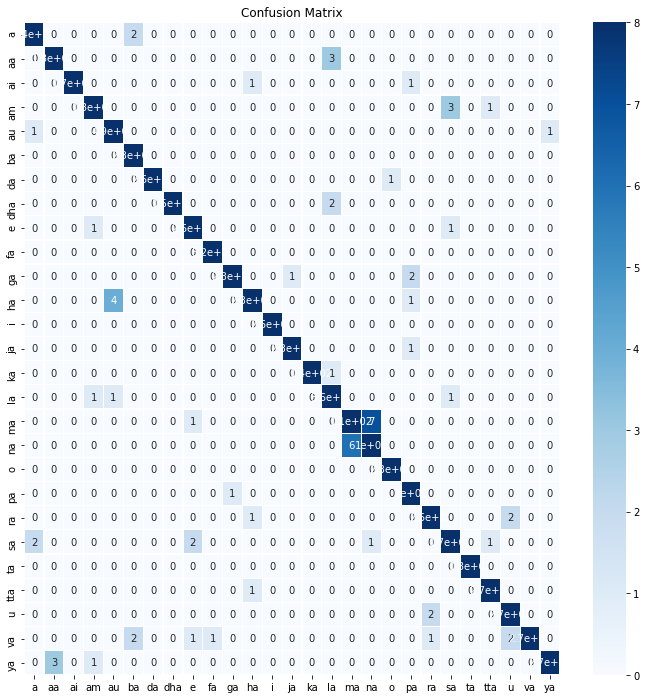

In [199]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping